# Imports 
Import the requisite python packages

In [1]:
import numpy as np 
from pymatgen.core import Structure
from pymatgen.io.vasp.outputs import Poscar
import matplotlib.pyplot as plt
import os
import pickle as pkl
from itertools import groupby
import shutil

# <a name="outline"></a> Outline 

* Take me to [convert to POSCAR class](#section_a)

* Take me to [Create Loop](#section_b)

# PNG TO POSCAR 
Class POSCAR takes a list of images and decodes them back to their respective POSCAR files. 

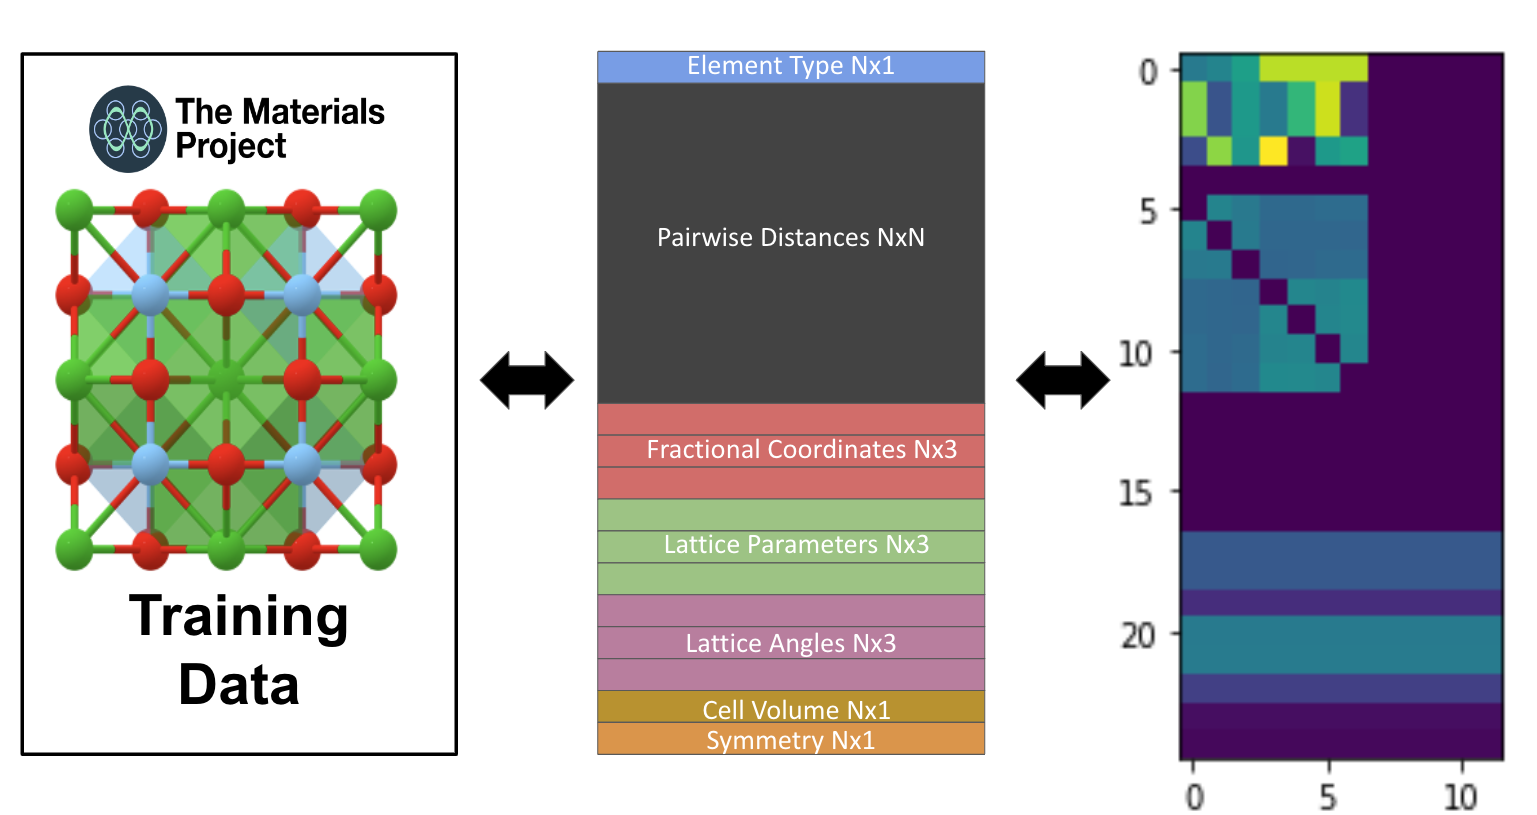

# <a name="section_a"></a>  From PNG back to POSCAR
The POSCAR class will process images of crystal structures and decode them back to their original POSCAR files
* Go back to [Outline](#outline)

In [33]:
class POSCAR():
    """
    POSCAR:
    
    contains all functions needed to convert an image representation back into a POSCAR file.
    
        extract_pwd: function that extracts pairwise distance matrices from images.
        
        extract_dims: function that extracts the system size of the crystal structure 
        
        extract_atomic_numbers: function that extracts the atomic number values from the first row of the image.
        
        coordinates: function that extracts the coordinate values 
        
        get_closest_number: function that outputs the closest number from a list to a reference list i.e. 
        list_to_check = [1,2,3,4,5] reference_list = [1,4,7] returns: [1,1,4,4,4]
        
        species: function that takes a list of atomic numbers and returns a species list 
        
        get_lattice_parameters: function that extracts all relevant lattice information from the image.
        
        create_poscar: function that takes extracted atomic numbers, extracted coordinates, and extracted 
        lattice parameters to create POSCAR files. 
        
    """  
    def extract_pwd(self,generated_structures):
        extracted_squares = []
        for generated_structure in generated_structures:
            extracted_rectangle = generated_structure[11:]
            extracted_square = []
            for line in extracted_rectangle:
                extracted_line = line[11:]
                extracted_square.append(extracted_line)
            extracted_squares.append(np.array(extracted_square))
        dims = []
        count = 0
        first_lines = []
        for square in extracted_squares:
            first_lines.append(square[0])
        dims = []
        for line in first_lines:
            filter_val = line[1]
            bools = []
            for pixel in line:
                if pixel>filter_val/4:
                    bools.append(True)
                else:
                    bools.append(False)
            dims.append(bools)
        dims2 = []
        count = 0 
        for booleans in dims:
            dim2 = []
            for boolean in range(len(booleans)- 1, -1, -1):
                if booleans[boolean]:
                    dim2.append(boolean+1)
            if len(dim2) == 0:
                dims2.append(1)
            else:
                dims2.append(dim2[0])

        return extracted_squares,dims2
    
    def extract_dims(self,generated_structures,elem_list):
        elem_dict = {'H': 0, 'He': 1, 'Li': 2, 'Be': 3, 'B': 4, 'C': 5, 'N': 6, 'O': 7, 'F': 8, 'Ne': 9,
            'Na': 10, 'Mg': 11, 'Al': 12, 'Si': 13, 'P': 14, 'S': 15, 'Cl': 16, 'Ar': 17, 'K': 18,
            'Ca': 19, 'Sc': 20, 'Ti': 21, 'V': 22, 'Cr': 23, 'Mn': 24, 'Fe': 25, 'Co': 26, 'Ni': 27,
            'Cu': 28, 'Zn': 29, 'Ga': 30, 'Ge': 31, 'As': 32, 'Se': 33, 'Br': 34, 'Kr': 35, 'Rb': 36,
            'Sr': 37, 'Y': 38, 'Zr': 39, 'Nb': 40, 'Mo': 41, 'Tc': 42, 'Ru': 43, 'Rh': 44, 'Pd': 45,
            'Ag': 46, 'Cd': 47, 'In': 48, 'Sn': 49, 'Sb': 50, 'Te': 51, 'I': 52, 'Xe': 53, 'Cs': 54,
            'Ba': 55, 'La': 56, 'Ce': 57, 'Pr': 58, 'Nd': 59, 'Pm': 60, 'Sm': 61, 'Eu': 62, 'Gd': 63,
            'Tb': 64, 'Dy': 65, 'Ho': 66, 'Er': 67, 'Tm': 68, 'Yb': 69, 'Lu': 70, 'Hf': 71, 'Ta': 72,
            'W': 73, 'Re': 74, 'Os': 75, 'Ir': 76, 'Pt': 77, 'Au': 78, 'Hg': 79, 'Tl': 80, 'Pb': 81,
            'Bi': 82 ,'Po': 83,'At': 84,'Rn': 85,'Fr': 86,'Ra': 87,'Ac': 88,'Th': 89,'Pa': 90,'U': 91,'Np': 92,
            'Pu': 93,'Am': 94,'Cm': 95,'Bk': 96,'Cf': 97,'Es': 98,'Fm': 99,'Md': 100,'No': 101,'Lr': 102,'Rf': 103,'Db': 104,
            'Sg': 105,'Bh': 106,'Hs': 107,'Mt': 108,'Ds': 109,'Rg': 110,'Cn': 111,'Nh': 112,'Fl': 113,'Mc': 114,'Lv': 115,
            'Ts': 116,'Og': 117}
        filter_vals = []
        for elem in elem_list:
            filter_val = elem_dict[elem]
            filter_vals.append(filter_val)
        filter_val = min(filter_vals)
            
        dims = []
        for generated_structure in generated_structures:
            count = 0 
            line = generated_structure[0]
            for pixel in line: 
                if pixel > filter_val/4:
                    count = count+1
                else:
                    count = count
            dims.append(count)
        return dims
    
    
    def extract_atomic_numbers(self,generated_structures,dims2,factor):
        extracted_atomic_numbers = []
        counter = 0
        for generated_structure in generated_structures:
            extracted_line = generated_structure[0][0:dims2[counter]]
            extracted_atomic_numbers.append(extracted_line)
            counter = counter+1
        return extracted_atomic_numbers
    
    
    def coordinates(self,generated_structures,dims2,factor):
        extracted_coordinates = []

        for generated_structure in generated_structures:
            extracted_coords = []
            extracted_coords_lines = generated_structure[1:4]
            extracted_coordinates.append(extracted_coords_lines)
            counter = 0 
        truncated_coords = []
        for extracted_coordinate in extracted_coordinates:
            truncated_coordinates = []
            for coordinate in extracted_coordinate:
                trunc_coord = coordinate[0:dims2[counter]]
                truncated_coordinates.append(trunc_coord)
            truncated_coords.append(np.array(truncated_coordinates).reshape(np.array(truncated_coordinates).shape[1],3)/factor)
            counter = counter+1

        return truncated_coords
    
    def closest_number(self,reference, numbers):
        min_vals = []
        for i in numbers:
            min_val =  min(reference, key=lambda x: abs(x - i))
            min_vals.append(min_val)
        return min_vals

    def species(self,extracted_atomic_numbers,elem_list,factor):
        
        element_dict = {'H': 0, 'He': 1, 'Li': 2, 'Be': 3, 'B': 4, 'C': 5, 'N': 6, 'O': 7, 'F': 8, 'Ne': 9,
            'Na': 10, 'Mg': 11, 'Al': 12, 'Si': 13, 'P': 14, 'S': 15, 'Cl': 16, 'Ar': 17, 'K': 18,
            'Ca': 19, 'Sc': 20, 'Ti': 21, 'V': 22, 'Cr': 23, 'Mn': 24, 'Fe': 25, 'Co': 26, 'Ni': 27,
            'Cu': 28, 'Zn': 29, 'Ga': 30, 'Ge': 31, 'As': 32, 'Se': 33, 'Br': 34, 'Kr': 35, 'Rb': 36,
            'Sr': 37, 'Y': 38, 'Zr': 39, 'Nb': 40, 'Mo': 41, 'Tc': 42, 'Ru': 43, 'Rh': 44, 'Pd': 45,
            'Ag': 46, 'Cd': 47, 'In': 48, 'Sn': 49, 'Sb': 50, 'Te': 51, 'I': 52, 'Xe': 53, 'Cs': 54,
            'Ba': 55, 'La': 56, 'Ce': 57, 'Pr': 58, 'Nd': 59, 'Pm': 60, 'Sm': 61, 'Eu': 62, 'Gd': 63,
            'Tb': 64, 'Dy': 65, 'Ho': 66, 'Er': 67, 'Tm': 68, 'Yb': 69, 'Lu': 70, 'Hf': 71, 'Ta': 72,
            'W': 73, 'Re': 74, 'Os': 75, 'Ir': 76, 'Pt': 77, 'Au': 78, 'Hg': 79, 'Tl': 80, 'Pb': 81,
            'Bi': 82 ,'Po': 83,'At': 84,'Rn': 85,'Fr': 86,'Ra': 87,'Ac': 88,'Th': 89,'Pa': 90,'U': 91,'Np': 92,
            'Pu': 93,'Am': 94,'Cm': 95,'Bk': 96,'Cf': 97,'Es': 98,'Fm': 99,'Md': 100,'No': 101,'Lr': 102,'Rf': 103,'Db': 104,
            'Sg': 105,'Bh': 106,'Hs': 107,'Mt': 108,'Ds': 109,'Rg': 110,'Cn': 111,'Nh': 112,'Fl': 113,'Mc': 114,'Lv': 115,
            'Ts': 116,'Og': 117}


        species_list = []
        for atomic_numbers in extracted_atomic_numbers:
            atomic_numbers_list = []
            for atomic_number in atomic_numbers:
                species = round(float(atomic_number/factor))
                atomic_numbers_list.append(species)
            species_list.append(atomic_numbers_list)

        reference_species = [element_dict[element] for element in elem_list]
        species_list2 = []    
        for elems2 in species_list:
            for elem in elem_list:
                closest_species = self.closest_number(reference_species,elems2)
            species_list2.append(closest_species)

        species_list3 = []
        for elems3 in species_list2:
            elem_list2 = []
            for atomic_numbers in elems3:
                elem = list(element_dict.keys())[atomic_numbers]
                elem_list2.append(elem)
            species_list3.append(elem_list2)
        return species_list3



    def get_lattice_parameters(self,generated_structures,factor):
        lattice_parameters = []
        for structure in generated_structures:
            lattice = []
            c = structure[6]
            b = structure[5]
            a = structure[4]
            c_mean = sum(c)/len(c)
            b_mean = sum(b)/len(b)
            a_mean = sum(a)/len(a)
            lattice.append(a_mean/factor)
            lattice.append(b_mean/factor)
            lattice.append(c_mean/factor)
            lattice_parameters.append(lattice)
        return lattice_parameters
    
    
    def create_poscar(self,truncated_coords,species_list,lattice_parameters,composition,date,system_size,dir_num,path):
        
        """
        create_poscar: 

        function that takes extracted atomic numbers, extracted coordinates, and extracted lattice parameters to 
        create POSCAR files. 

        Args:
            truncated_coords: a list of 3xN numpy.arrays that contain either the fractional or cartesian coordinates
            of your crystal structure image. 

            species_list: a list of species used to specify element type for your crystal structure file.

            lattice_parameters: a list of 3xN numpy arrays that contain the values of lattice parameters for 
            the crystal structure 

            composition: used to write a directory for your specified composition. For example, if the composition was
            'Nb3Sn' this function will create a directory called Nb3Sn in a specified path

            date: used to write a directory for a specified date inside the composition directory. 

            system_size: Will filter all structures of a certain system size. If system_size == None, then there will
            be no filter applied

            dir_num: used to write a directory for a specified directory number inside the date directory. 

            path: the root path that will be used to write the composition, date, and dir_num directories.


        """  
        coordinates_list = []
        for coords in truncated_coords:
            coordinates_list.append(coords)
            
        lattice_matrices = []
        for lattice_parameter in lattice_parameters:
            zeros = np.zeros((3,3))
            zeros[0][0] = lattice_parameter[0]
            zeros[1][1] = lattice_parameter[1]
            zeros[2][2] = lattice_parameter[2]
            lattice_matrices.append(zeros)
        
        composition_path = path + '/' + composition
        if os.path.exists(composition_path):
            print(f"The directory '{composition_path}' exists.")
        else:
            os.mkdir(composition_path)
            
        
        date_path = composition_path + '/' + date
        if os.path.exists(date_path):
            print(f"The directory '{date_path}' exists.")
        else:
            os.mkdir(date_path)
        
        if dir_num != None:
            directory_path = date_path + '/' + f'{dir_num}'
            if os.path.exists(directory_path):
                print(f"The {directory_path} exists.")
                shutil.rmtree(directory_path)
                print(f"The {directory_path} path has been deleted.")
                os.mkdir(directory_path)
            else:
                os.mkdir(directory_path)
        else:
            dir_num = 'base'
            os.mkdir(date_path + '/' + 'base')
        
        if system_size == None:   
            structure_list = []
            for index in range(len(lattice_parameters)):
                pymatgen_struct = Structure(lattice_matrices[index],species_list3[index],coordinates_list[index])
                structure_list.append(pymatgen_struct)
                poscar = Poscar(pymatgen_struct)
                
                poscar_path = directory_path + '/' f'{composition}{index}.POSCAR'
                poscar.write_file(poscar_path)
        else: 
            structure_list = []
            count = 0 
            for index in range(len(lattice_parameters)):
                pymatgen_struct = Structure(lattice_matrices[index],species_list3[index],coordinates_list[index])
                structure_list.append(pymatgen_struct)
                if len(pymatgen_struct.atomic_numbers) == system_size:
                    poscar = Poscar(pymatgen_struct)
                    poscar_path = directory_path + '/' f'{composition}{count}.POSCAR'
                    poscar.write_file(poscar_path)
                    count = count+1
                else:
                    pass
                
        return structure_list
        
        
            
            
    
            
            

### Take normalized images from generated images and decode them 

In [34]:
divisor_list = [160.0,124.93125,124.99325000000006,124.93487500000003,97.67724,136.95821960160626,
 247.4394235,154.55304319,154.55304319,145.94208211,276.63259794599696]
factor_list = [4,125,125,125,10,10,10,1,1,1,0.2]

In [35]:
normalized_arrays = []
for i in os.listdir('/blue/hennig/sam.dong/GANs/generated_structures/dft_test'):
    print(i)
    arr = np.load(f'/blue/hennig/sam.dong/GANs/generated_structures/dft_test/{i}')
    for img in range(len(arr)):
        arr[img] = arr[img] * np.array(divisor_list)[:,np.newaxis]
        arr[img] = arr[img] / np.array(factor_list)[:,np.newaxis]
    normalized_arrays.append(arr)
        
        
        
        

generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_8.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_5.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_1.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_6.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_19.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_13.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_17.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_11.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_18.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_normal_noise_15.npy
generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_03_26_2024_test_b_n

In [36]:
poscar = POSCAR()

# <a name="section_b"></a>  Create a loop
This employs the POSCAR class to create directories of a specified composition and date which will store separate
structures. 
* Go back to [Outline](#outline)

In [37]:
path = '/blue/hennig/sam.dong/GANs/generated_structures/poscar'
date = 'test_3_29_2024'
date2 = 'test'
composition = 'Zr_Cu_Al_wgans_truncated_size_6_dft_test'
poscar = POSCAR()
elem_list = ['Zr','Cu','Al']
for i in range(1):
    filepath = f'/blue/hennig/sam.dong/GANs/generated_structures/dft_test/generated_structures_wgans_Zr_Cu_Al_truncated_with_dft_{date}_test_b_normal_noise_{i}.npy'
    #generated_images = np.load(filepath)
    generated_images = normalized_arrays[i]
    dims2 = poscar.extract_dims(generated_images,elem_list =  ['Zr','Cu','Al'])
    extracted_atomic_numbers = poscar.extract_atomic_numbers(generated_images,dims2,1)
    species_list3 = poscar.species(extracted_atomic_numbers,elem_list,1)
    truncated_coords = poscar.coordinates(generated_images,dims2,1)
    lattice_parameters = poscar.get_lattice_parameters(generated_images,1)
    structs = poscar.create_poscar(truncated_coords,species_list3,lattice_parameters,composition,date2,6,i,path)


The directory '/blue/hennig/sam.dong/GANs/generated_structures/poscar/Zr_Cu_Al_wgans_truncated_size_6_dft_test' exists.
The directory '/blue/hennig/sam.dong/GANs/generated_structures/poscar/Zr_Cu_Al_wgans_truncated_size_6_dft_test/test' exists.


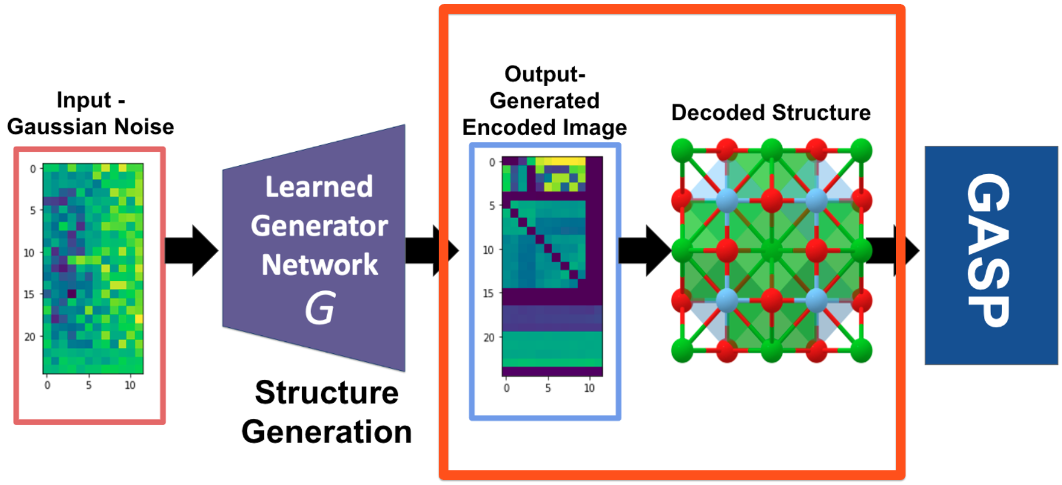